In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

from sklearn.preprocessing import StandardScaler

import xgboost
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# **Loading the dataset**

In [26]:
data = pd.read_csv('loan_detection.csv')
data

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


# **Performing Basic EDA**

In [27]:
data.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon'

In [28]:
data.shape

(41188, 60)

In [29]:
data.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# data.describe()

In [31]:
data['Loan_Status_label'].value_counts()

Loan_Status_label
0    36548
1     4640
Name: count, dtype: int64

In [32]:
data.shape

(41188, 60)

In [33]:
df = data.copy()

In [34]:
df['loan_status'] = df['Loan_Status_label']

In [35]:
df.head()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label,loan_status
0,56,1,999,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [36]:
df['loan_status'].value_counts()

loan_status
0    36548
1     4640
Name: count, dtype: int64

In [37]:
df.drop(columns=['Loan_Status_label'],inplace=True)

In [38]:
df.head(2)

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,loan_status
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [39]:
df.isna().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university

In [40]:
df.duplicated().sum()

np.int64(2417)

In [41]:
df.drop_duplicates(inplace = True)

In [42]:
df.shape

(38771, 60)

# **Checking for outliers**

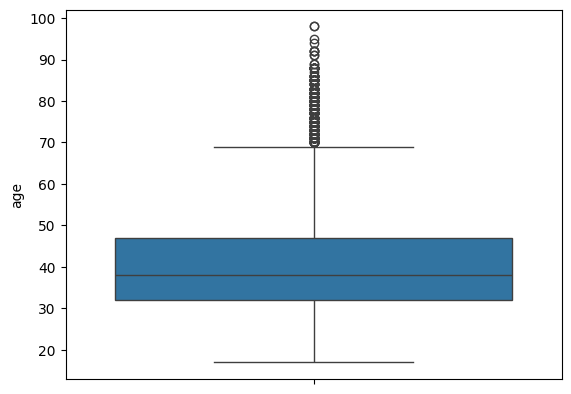

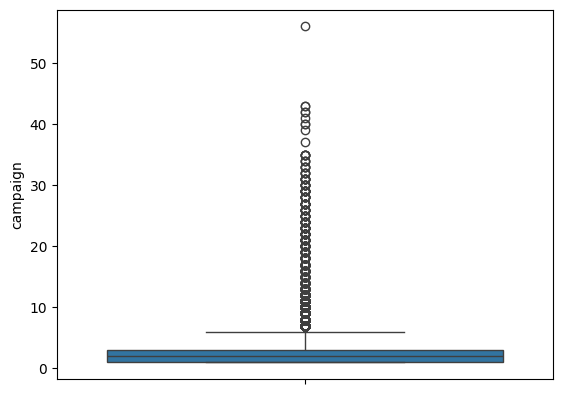

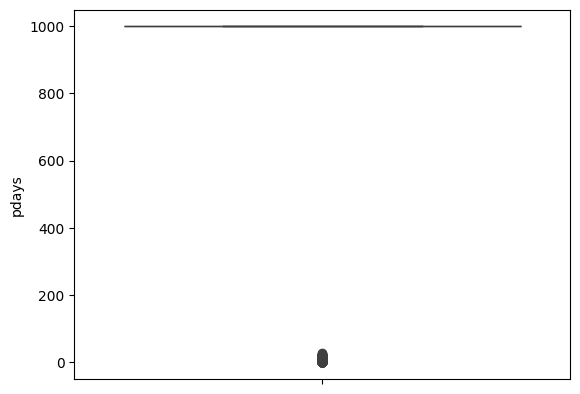

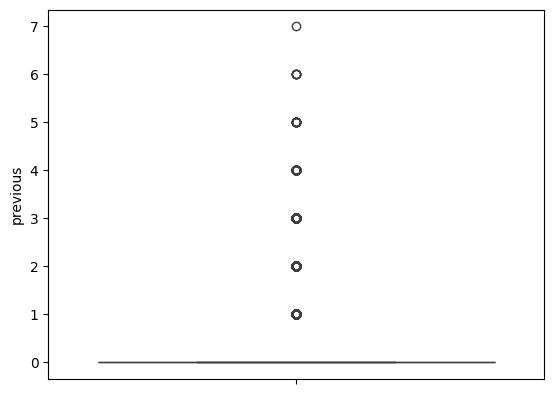

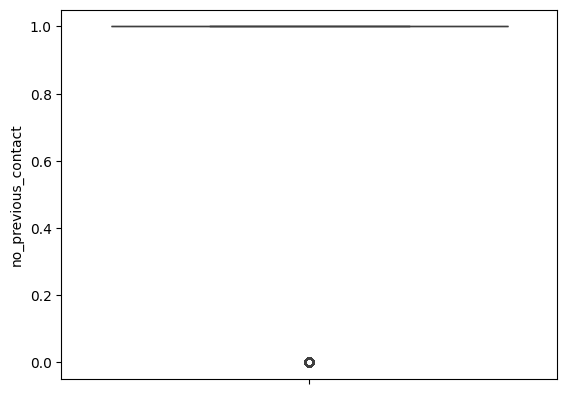

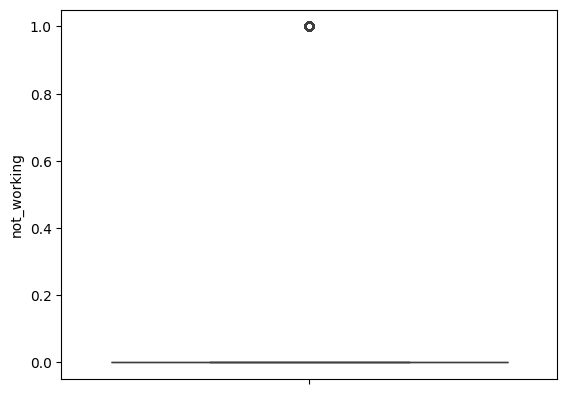

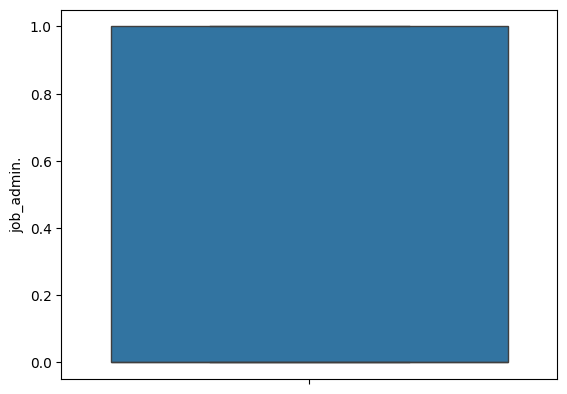

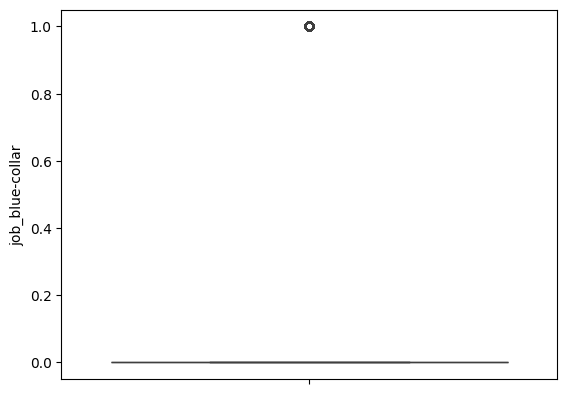

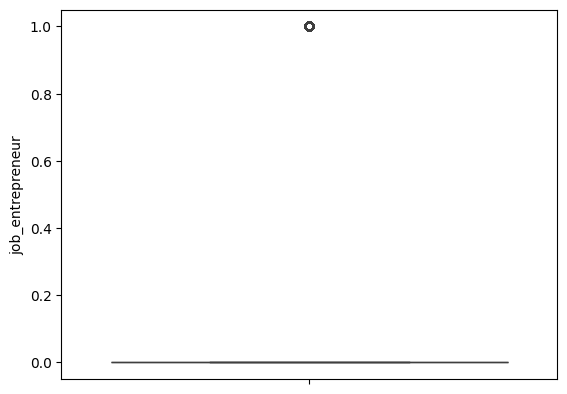

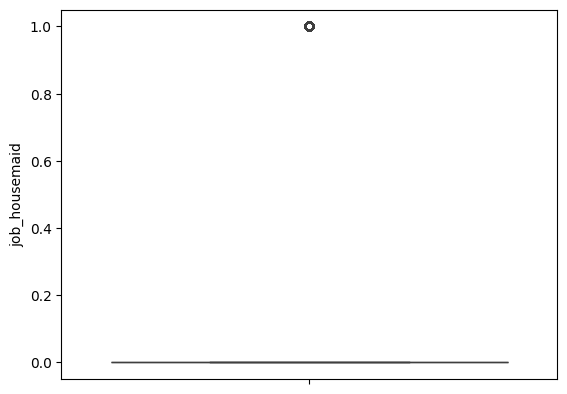

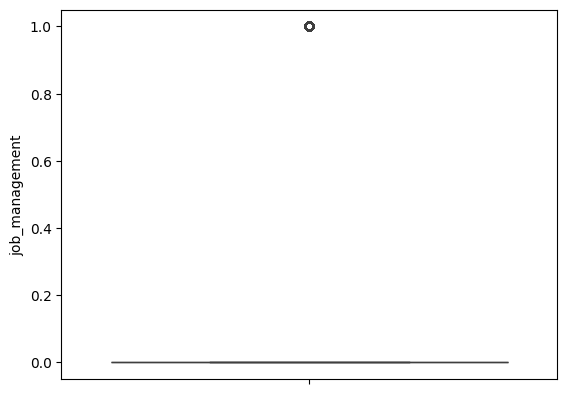

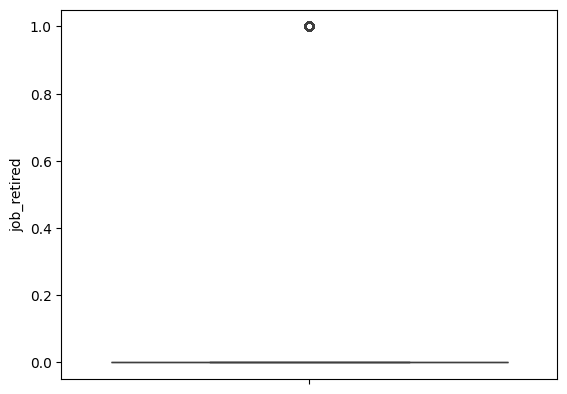

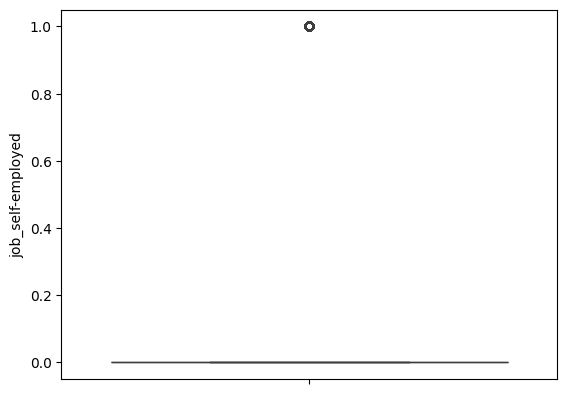

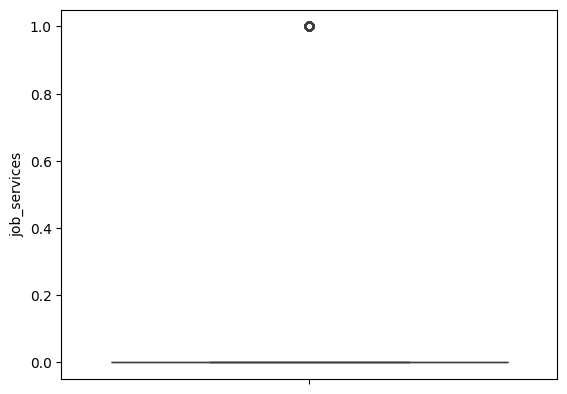

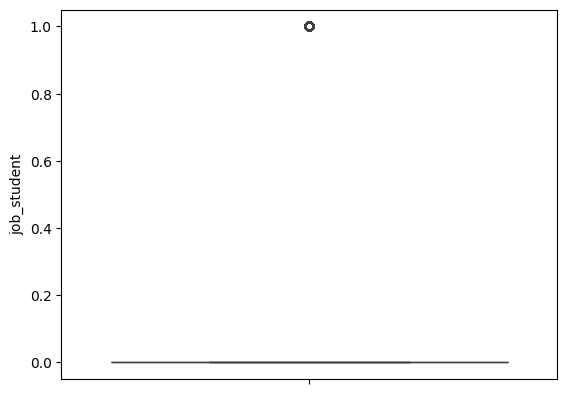

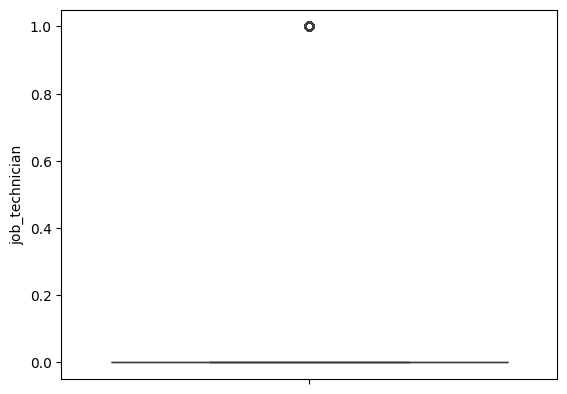

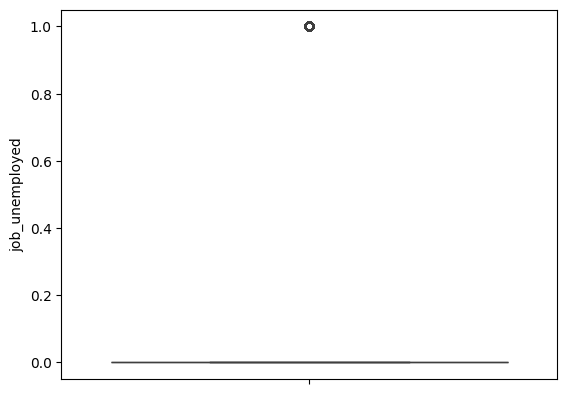

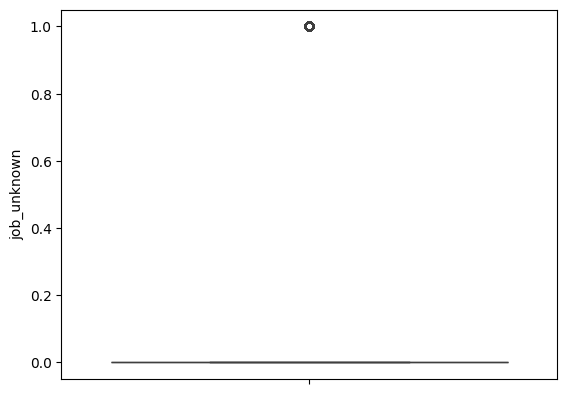

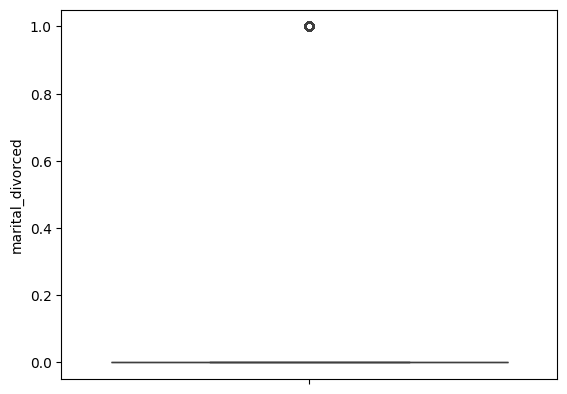

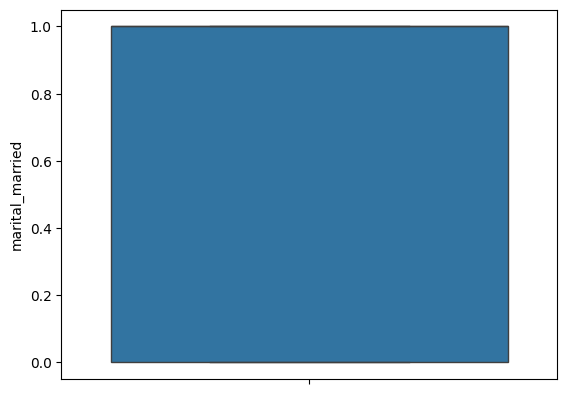

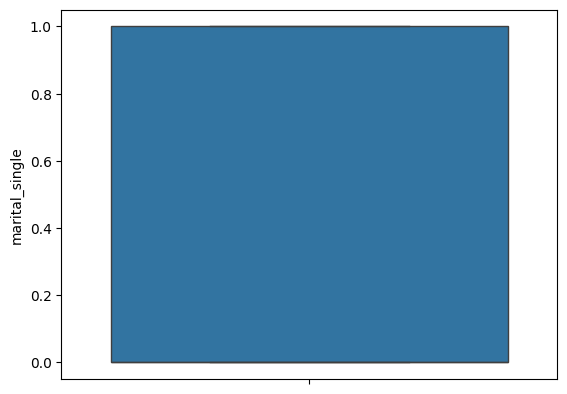

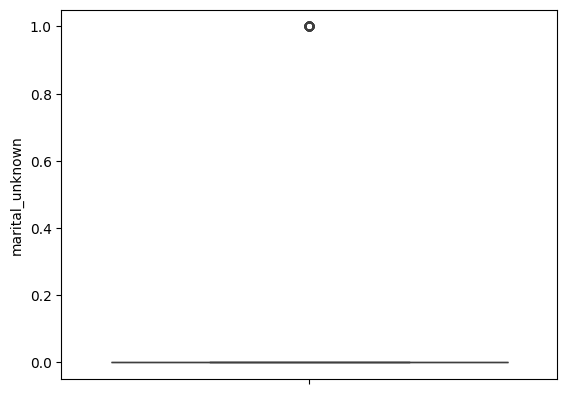

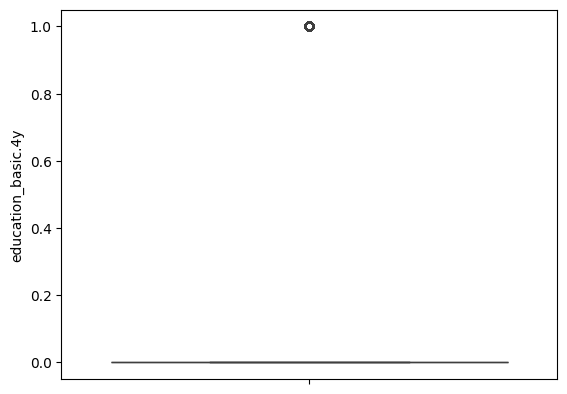

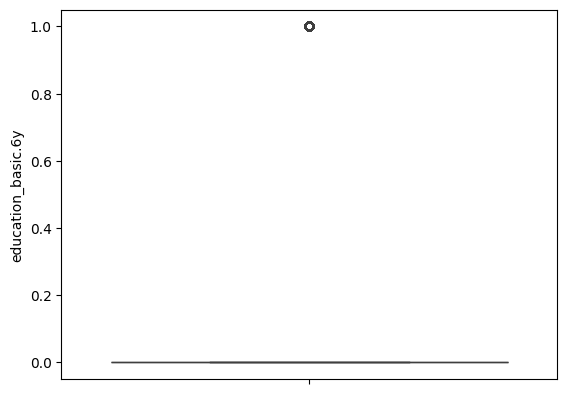

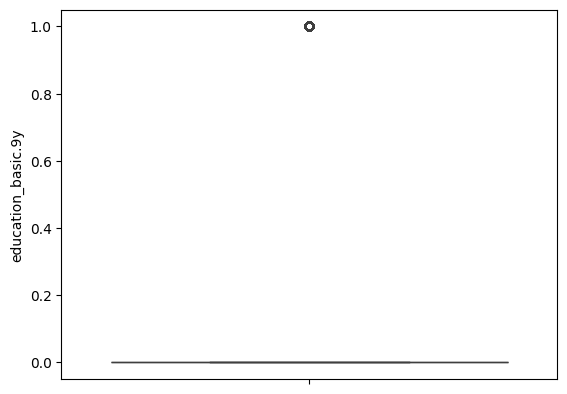

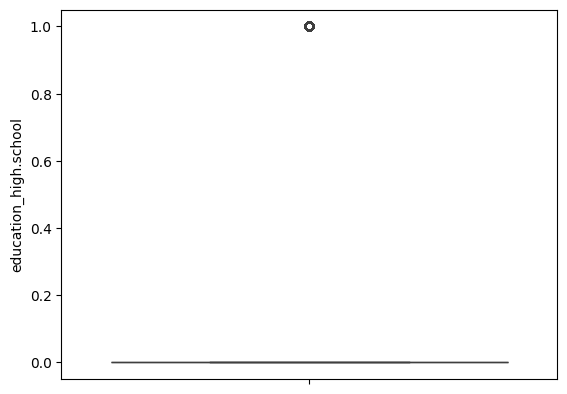

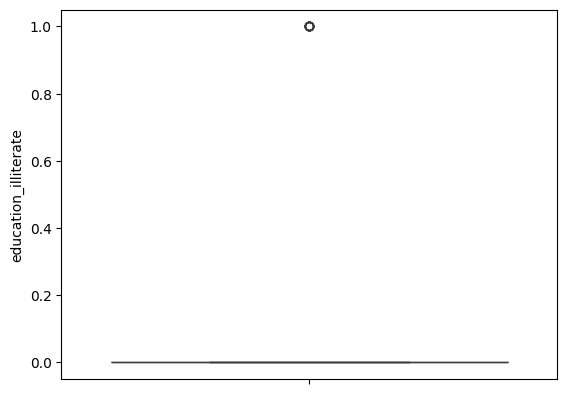

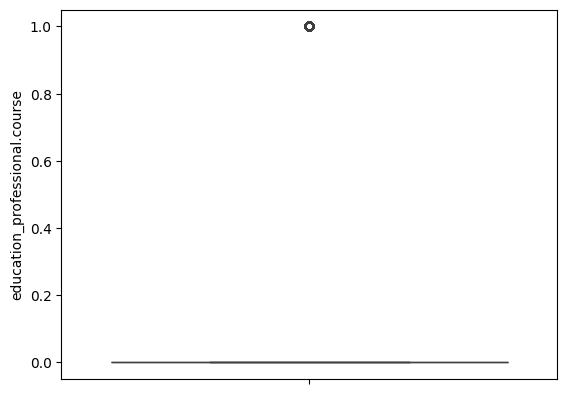

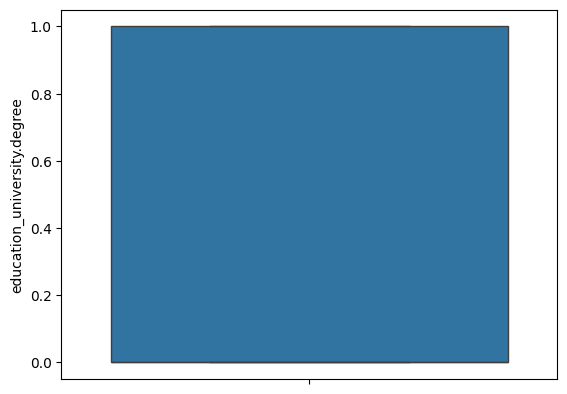

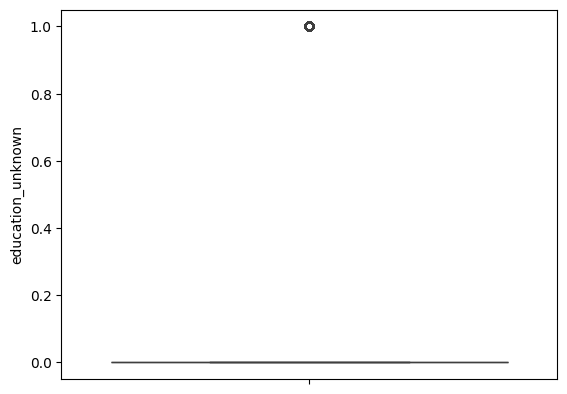

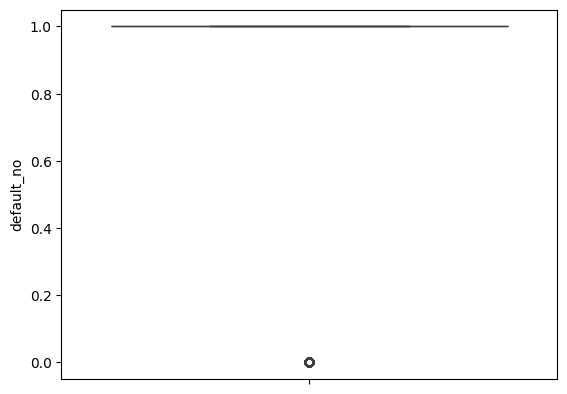

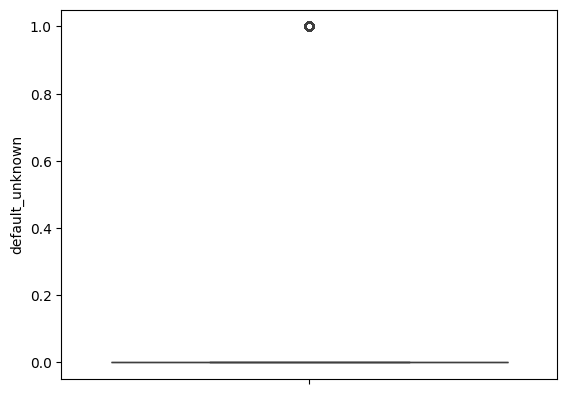

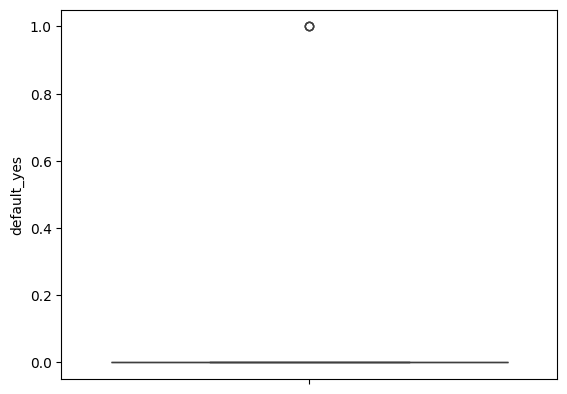

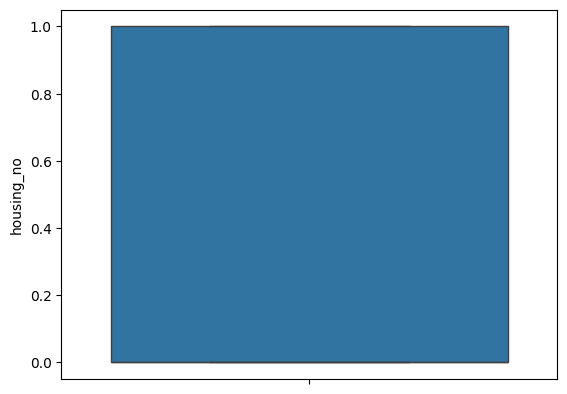

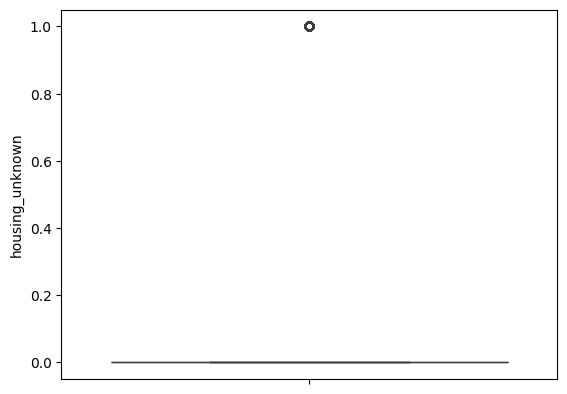

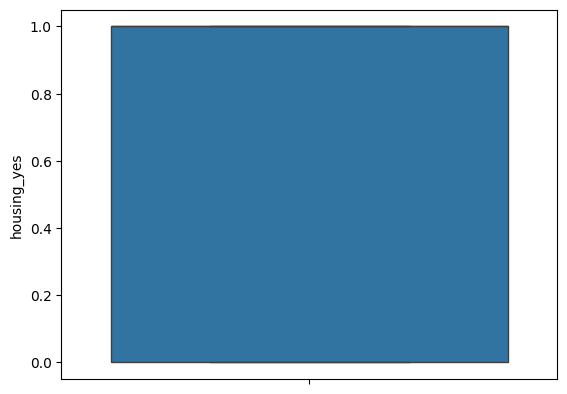

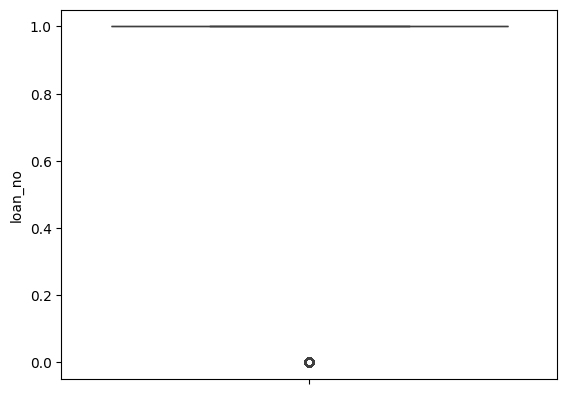

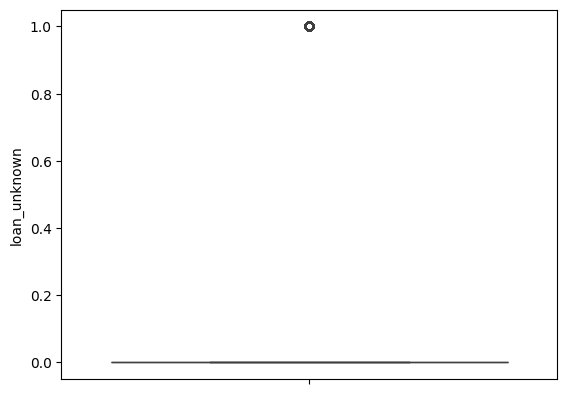

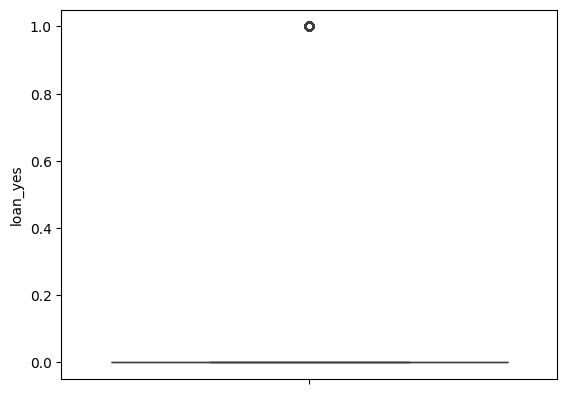

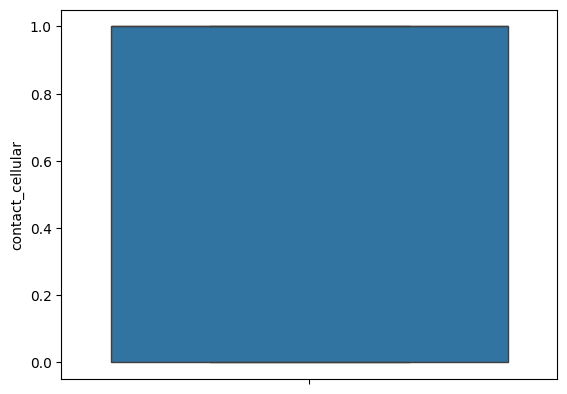

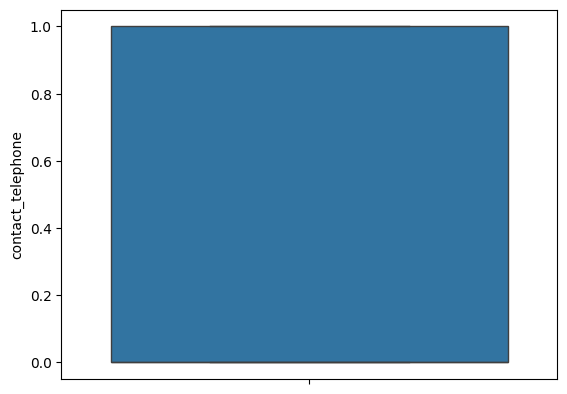

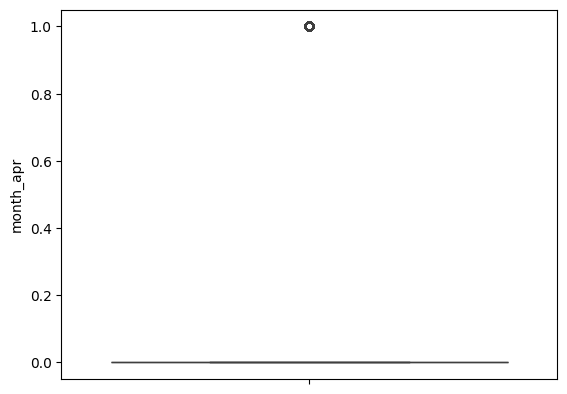

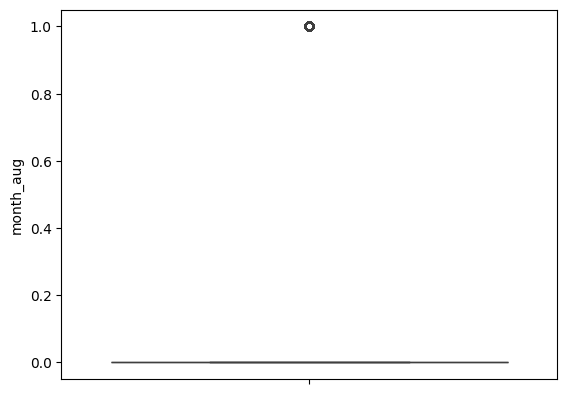

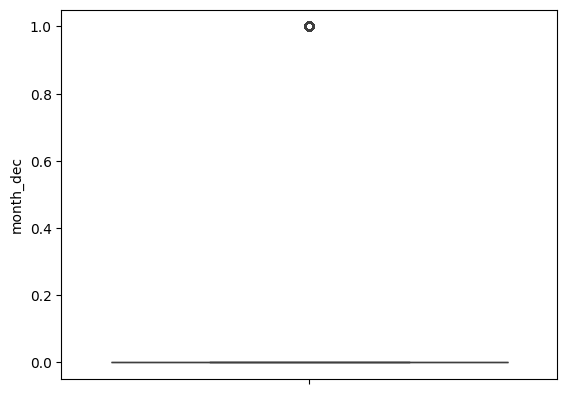

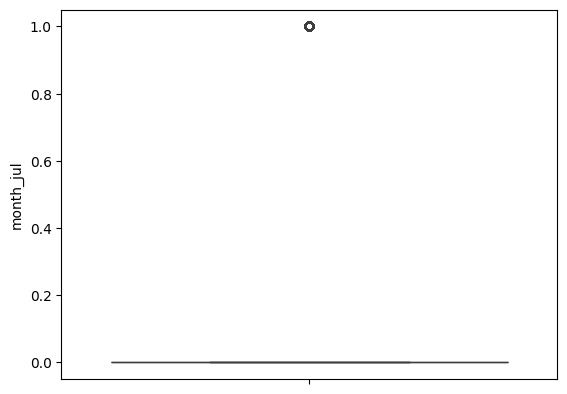

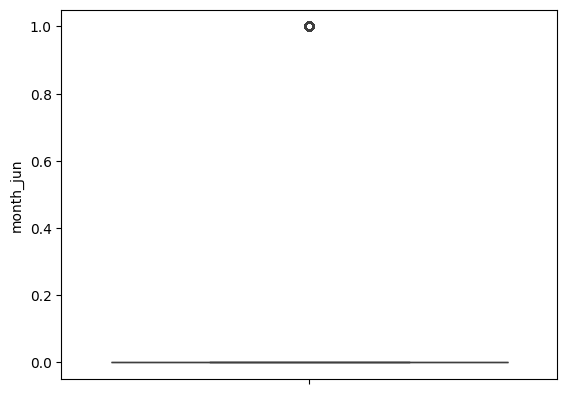

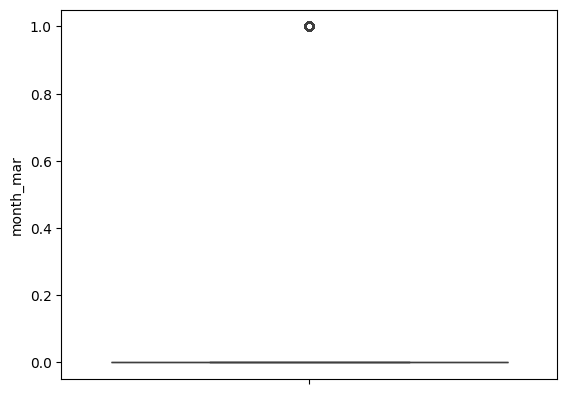

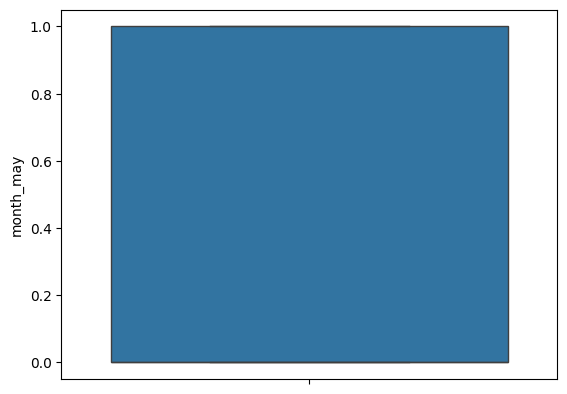

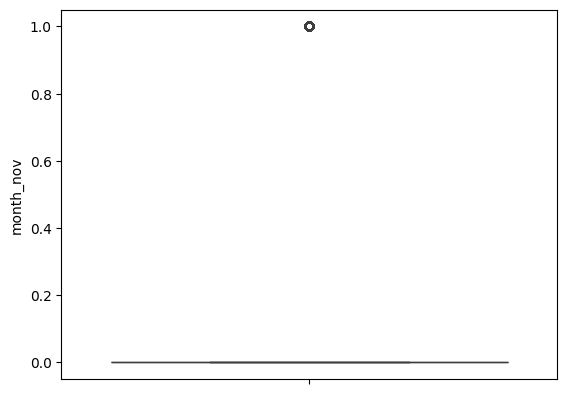

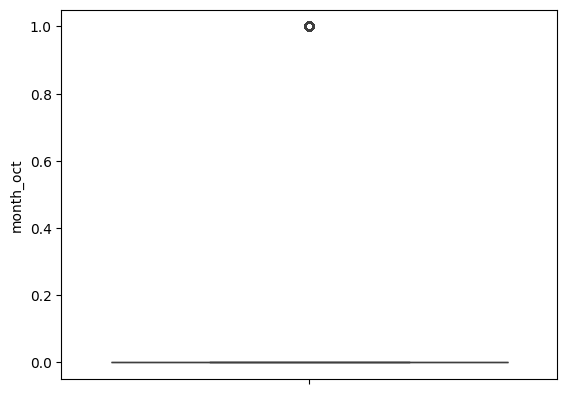

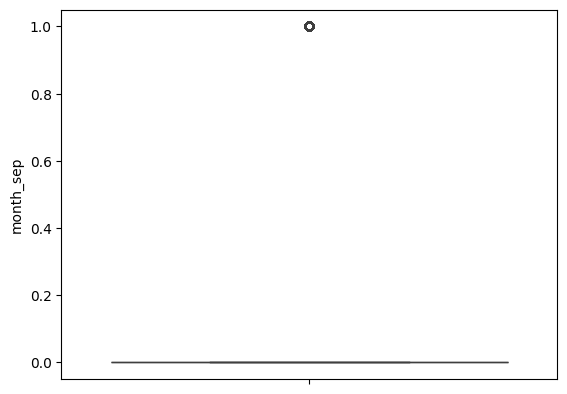

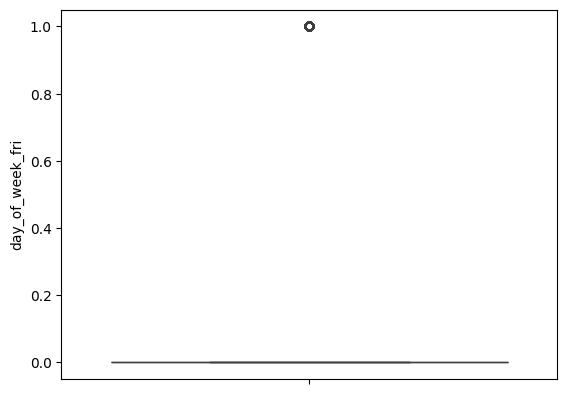

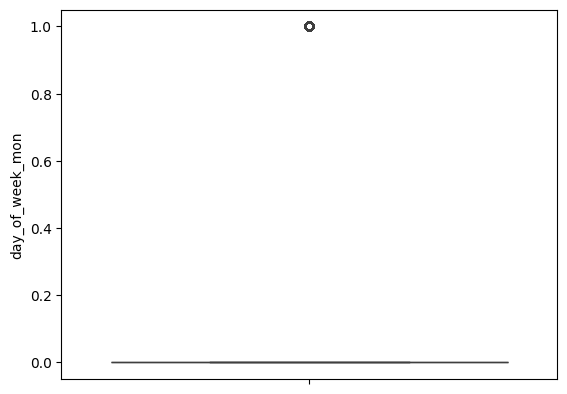

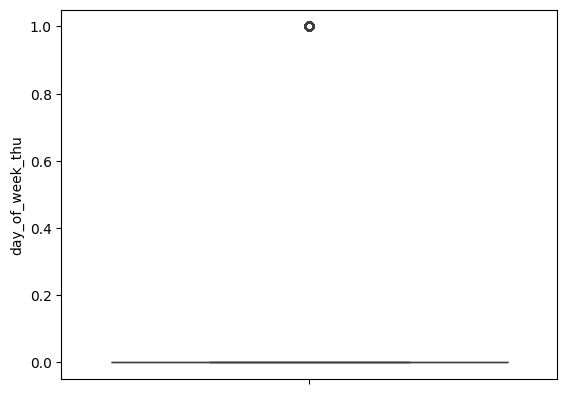

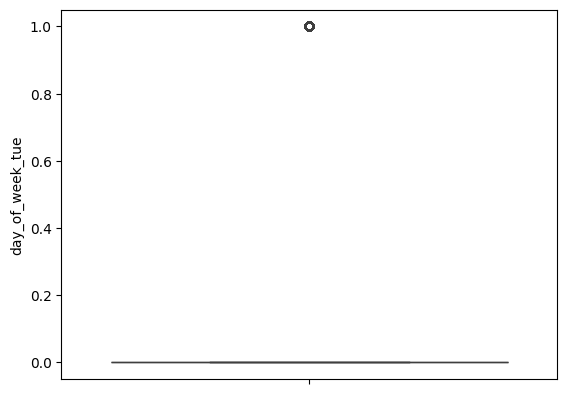

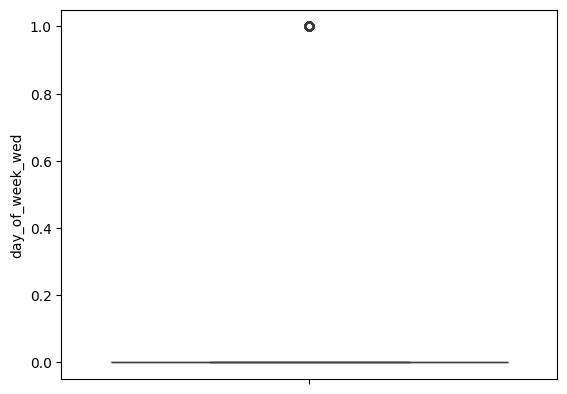

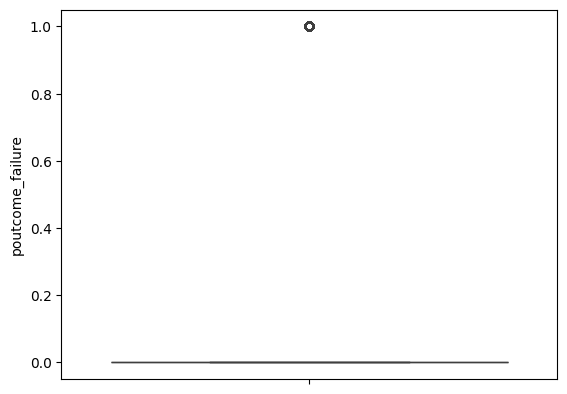

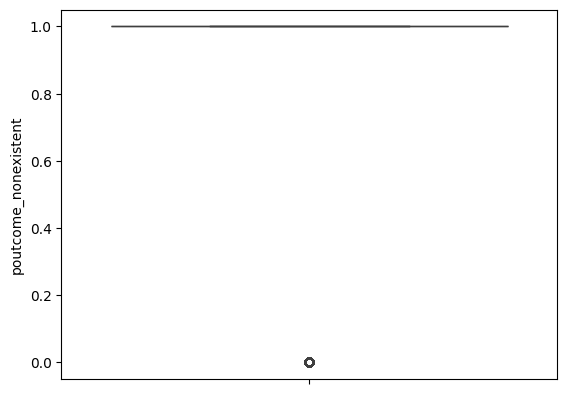

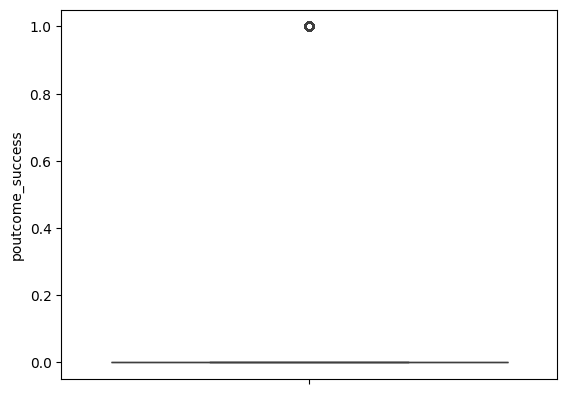

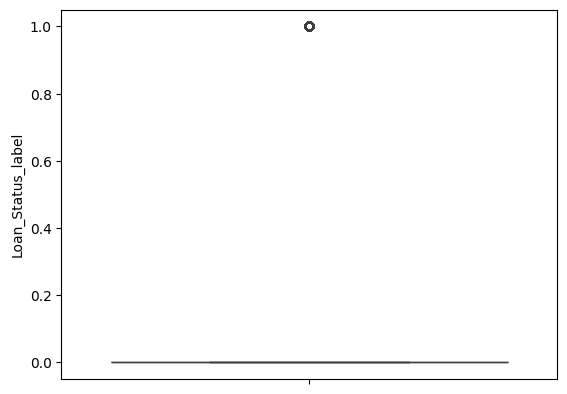

In [43]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

# **Removing Outliers Using IQR(Inter Quartile Meathod**

In [44]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1

upper_limit = (Q3+1.5*IQR)
lower_limit = (Q1-1.5*IQR)

# **Creating function for removing outliers**

In [45]:
def remove_outliers(data_frame,target_feature):
    for i in data_frame.columns:
        if i == target_feature:
            continue
        else:
            Q1 = data_frame[i].quantile(0.25)
            Q3 = data_frame[i].quantile(0.75)
            IQR = Q3-Q1
            lower_limit = (Q1-1.5*IQR)
            upper_limit = (Q3+1.5*IQR)
            data_frame = data_frame[(data_frame[i]>=lower_limit) & (data_frame[i]<=upper_limit)]
    print('Sucessfuly Outliers Removed')
    print(f'Sape of the data frame after removing the outliers : {data_frame.shape}')
    return data_frame

In [46]:
data = remove_outliers(data,'loan_status')

Sucessfuly Outliers Removed
Sape of the data frame after removing the outliers : (1289, 60)


# **As using IQR meathod we are Losing more tan 60% data so are going with outliers to build model**

# **Imbalance Data**

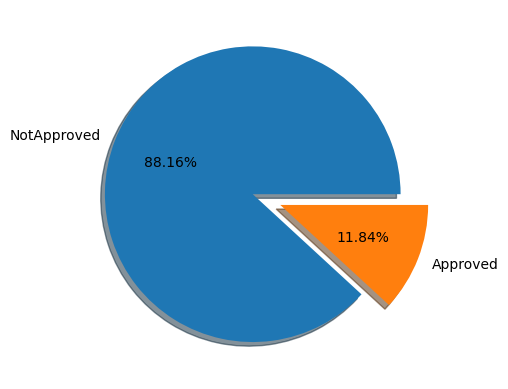

In [47]:
plt.pie(df['loan_status'].value_counts(), autopct = '%1.2f%%', explode = [0,0.2], labels = ['NotApproved','Approved'] , startangle =0 , shadow =True )
plt.show()

In [48]:
df['loan_status'].value_counts()

loan_status
0    34179
1     4592
Name: count, dtype: int64

In [49]:
df.shape

(38771, 60)

# **Feature Selection**

In [50]:
df.corr()['loan_status']

age                              0.026865
campaign                        -0.074539
pdays                           -0.324611
previous                         0.228665
no_previous_contact             -0.324572
not_working                      0.118294
job_admin.                       0.035250
job_blue-collar                 -0.075625
job_entrepreneur                -0.019306
job_housemaid                   -0.007496
job_management                  -0.001627
job_retired                      0.091108
job_self-employed               -0.006224
job_services                    -0.033042
job_student                      0.092536
job_technician                  -0.003678
job_unemployed                   0.012016
job_unknown                     -0.002082
marital_divorced                -0.013390
marital_married                 -0.043307
marital_single                   0.056264
marital_unknown                  0.004679
education_basic.4y              -0.011243
education_basic.6y              -0

In [51]:
df.drop(columns=['no_previous_contact','pdays','default_unknown','housing_unknown','loan_unknown','housing_yes','loan_yes','contact_telephone','marital_unknown','poutcome_success','loan_no','day_of_week_tue','day_of_week_wed','month_aug','education_professional.course','education_high.school','job_unknown','job_technician','job_self-employed','job_management'],inplace=True)

In [52]:
df.shape

(38771, 40)

In [53]:
df.columns

Index(['age', 'campaign', 'previous', 'not_working', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_retired',
       'job_services', 'job_student', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_illiterate',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_yes', 'housing_no', 'contact_cellular', 'month_apr',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'poutcome_failure',
       'poutcome_nonexistent', 'loan_status'],
      dtype='object')

# **Seperating Independent and Dependent Feature**

In [54]:
X = df.drop(columns = ['loan_status'],axis=1)
y = df['loan_status']

In [55]:
X,y

(       age  campaign  previous  not_working  job_admin.  job_blue-collar  \
 0       56         1         0            0           0                0   
 1       57         1         0            0           0                0   
 2       37         1         0            0           0                0   
 3       40         1         0            0           1                0   
 4       56         1         0            0           0                0   
 ...    ...       ...       ...          ...         ...              ...   
 41183   73         1         0            1           0                0   
 41184   46         1         0            0           0                1   
 41185   56         2         0            1           0                0   
 41186   44         1         0            0           0                0   
 41187   74         3         1            1           0                0   
 
        job_entrepreneur  job_housemaid  job_retired  job_services  ...  \

In [56]:
df.head()

,age,campaign,previous,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_retired,job_services,...,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,poutcome_failure,poutcome_nonexistent,loan_status
0,56,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,57,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
2,37,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
3,40,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,56,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0


# **Feature_Scalling**

In [57]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [58]:
X = scaler.transform(X)
y = df['loan_status']

In [59]:
X,y

(array([[ 1.50863669, -0.57750511, -0.3580508 , ..., -0.51213501,
         -0.34682864,  0.40808858],
        [ 1.60394573, -0.57750511, -0.3580508 , ..., -0.51213501,
         -0.34682864,  0.40808858],
        [-0.30223521, -0.57750511, -0.3580508 , ..., -0.51213501,
         -0.34682864,  0.40808858],
        ...,
        [ 1.50863669, -0.22442696, -0.3580508 , ..., -0.51213501,
         -0.34682864,  0.40808858],
        [ 0.36492812, -0.57750511, -0.3580508 , ..., -0.51213501,
         -0.34682864,  0.40808858],
        [ 3.22419954,  0.12865118,  1.61606576, ..., -0.51213501,
          2.88326822, -2.4504484 ]]),
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 41183    1
 41184    0
 41185    0
 41186    1
 41187    0
 Name: loan_status, Length: 38771, dtype: int64)

# **Train,Test and Split**

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **1 - Using LogisticRegressor**

In [61]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [62]:
print(f'Accuracy on Training : {round(logistic_model.score(X_train,y_train),2)*100}%')
print(f'Accuracy on Test : {round(logistic_model.score(X_test,y_test),2)*100}%')

Accuracy on Training : 89.0%
Accuracy on Test : 90.0%


# **2 - Using DecisionTreeClassifier**

In [63]:
tree = DecisionTreeClassifier(max_depth=8)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [64]:
print(f'Accuracy on Training : {round(tree.score(X_train,y_train),2)*100}%')
print(f'Accuracy on Test : {round(tree.score(X_test,y_test),2)*100}%')

Accuracy on Training : 90.0%
Accuracy on Test : 89.0%


# **3 - Using RandomForestClassifier**

In [65]:
forest = RandomForestClassifier(max_depth=5)
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [66]:
print(f'Accuracy on Training : {round(forest.score(X_train,y_train),2)*100}%')
print(f'Accuracy on Test : {round(forest.score(X_test,y_test),2)*100}%')

Accuracy on Training : 89.0%
Accuracy on Test : 89.0%


# **4 - Using XGBClassifier**

In [67]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
print(f'Accuracy on Training : {round(xgb.score(X_train,y_train),2)*100}%')
print(f'Accuracy on Test : {round(xgb.score(X_test,y_test),2)*100}%')

Accuracy on Training : 91.0%
Accuracy on Test : 90.0%


In [69]:
y_train_pred = tree.predict(X_train)

# **Model Prediction**

In [70]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# **Model Evaluation**

In [71]:
# Training

confusion_matrix(y_train,y_pred_train)

array([[27017,   268],
       [ 2427,  1304]])

In [72]:
accuracy_score(y_train,y_pred_train)

0.9131093629094661

<Axes: >

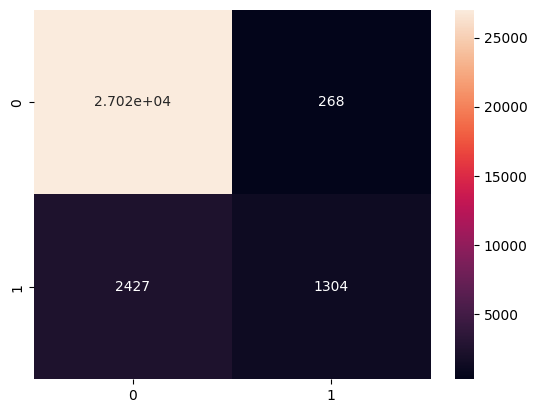

In [73]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot = True,fmt = '.4g')

In [74]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     27285
           1       0.83      0.35      0.49      3731

    accuracy                           0.91     31016
   macro avg       0.87      0.67      0.72     31016
weighted avg       0.91      0.91      0.90     31016



In [75]:
# Test Data

confusion_matrix(y_test,y_pred_test)

array([[6747,  147],
       [ 661,  200]])

In [76]:
accuracy_score(y_test,y_pred_test)

0.8958091553836235

In [77]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6894
           1       0.58      0.23      0.33       861

    accuracy                           0.90      7755
   macro avg       0.74      0.61      0.64      7755
weighted avg       0.87      0.90      0.88      7755



# **Building Predictive System**

In [78]:
input = ()

input_array = np.asarray(input)

reshaped_input = input_array.reshape(1,-1)

In [80]:
# Scalling the data
scaled_input = scaler.fit_transform(reshaped_input)

In [ ]:
# Making Predictions

prediction = xgb.predict(scaled_input)

if prediction == 1:
    print('loan not Approved')
else:
    print('loan approved')

# **Our model is performing too good due to presence of Outliers which is not recommended and our Target feature is also not well balanced So model is predicting very well for 0s but for 1s it is not performing well** 